In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.ImgOp import imshow
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

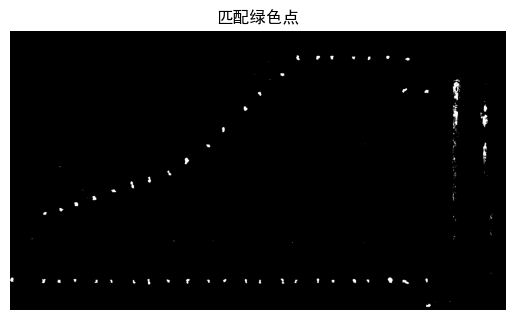

In [14]:
# 读取图像
image = cv2.imread('./saveImg/raw.jpg')

# 将图像转换为HSV颜色空间
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义绿色的HSV范围
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# 根据阈值创建掩膜
mask = cv2.inRange(hsv, lower_green, upper_green)
height, width = mask.shape

# 寻找连通块
connectivity = 4  # 或8，具体根据你的需求来确定
output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)

imshow(mask, title="匹配绿色点")


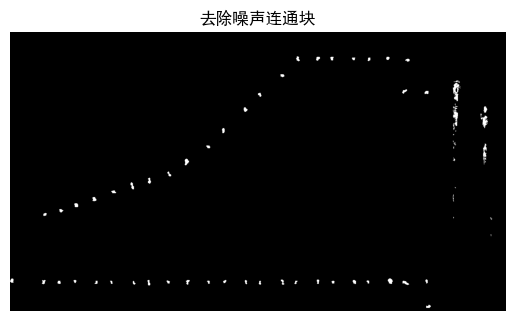

In [15]:
# 获取连通块属性
num_labels = output[0]
labels = output[1]
stats = output[2]
centroids = output[3]

# print(stats[:, -1])

threshold = 5

for label in range(1, output[0]):
    if stats[label, cv2.CC_STAT_AREA] < threshold:  
        # 如果连通块的像素点数小于阈值，则将对应像素赋值为 0
        labels[labels == label] = 0
new_mask = np.where(labels > 0, 255, labels).astype(np.uint8)

imshow(new_mask, title="去除噪声连通块")


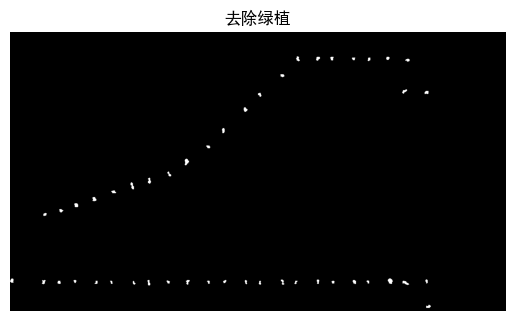

In [16]:
List = []
th_right = 1100

# 去除图片中右边的绿植
for y in range(height):
    for x in range(width):
        if x > th_right:
            new_mask[y, x] = 0  # 将对应位置的像素标签设为 0，即赋值为黑色

imshow(new_mask, title="去除绿植")

In [18]:
# 重新获得上图的连通块
new_output = cv2.connectedComponentsWithStats(new_mask, connectivity, cv2.CV_32S)
print(len(new_output[3]))

48


In [23]:
# 写入json文件
import json
with open('./config/settings.json', 'r') as f:
    data = json.load(f)
with open('./config/data.json', 'w') as f:
    data.cnt += len(new_output[3])
    json.dump([{"x": x, "y": y, "is_entrance": 0, "is_empty": 0, "id" : None, 
                "is_parking": 0} 
        for x, y in new_output[3]], f, indent=4)
with open('./config/settings.json') as f:
    json.dump(data, f, indent=4)